In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc

from joblib import dump
from imblearn.over_sampling import SMOTE


In [2]:
data = pd.read_csv('../../../DATA/Concatination_of_ters/Without_Индекс стоимости жизни/classes.csv').dropna()


In [3]:
X, y = data.drop('Средняя численность работников, включая внешних совместителей',
                 axis=1), data['Средняя численность работников, включая внешних совместителей']
X_balanced, y_balanced = SMOTE().fit_resample(X, y)


In [4]:
X_balanced['Средняя численность работников, включая внешних совместителей'] = y_balanced


In [5]:
data_smoted = X_balanced

# WO Smoted

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Средняя численность работников, включая внешних совместителей', axis=1),
                                                    data['Средняя численность работников, включая внешних совместителей'], test_size=0.5, random_state=42)


In [12]:
svc_optimal_n_neighbors = GridSearchCV(SVC(),
                                             {'probability': [True, False],
                                              'C': np.arange(1.8, 2, 0.01),
                                            #   'tol': np.arange(0, 2e-3, 1e-4),
                                            #   'degree': np.arange(0, 10, 1),
                                            #   'gamma': ['scale'] + [*np.arange(0, 1, 0.1)],
                                            #   'coef0': np.arange(0, 1, 0.1),
                                              'shrinking': [True, False],
                                              'break_ties': [True, False],
                                              'decision_function_shape': ['ovo', 'ovr'],
                                              'kernel': ['linear','poly','rbf','sigmoid']},
                                              n_jobs=6,
                                              scoring='recall',
                                              cv=3
                                              ).fit(X_train, y_train)
svc_optimal_n_neighbors.best_params_


c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.05555556 0.05555556 0.05555556]
  warnings.warn(


{'C': 1.9000000000000001,
 'break_ties': True,
 'decision_function_shape': 'ovr',
 'kernel': 'sigmoid',
 'probability': True,
 'shrinking': True}

In [13]:
y_predicted = svc_optimal_n_neighbors.predict(X_test)


In [14]:
print(confusion_matrix(y_test, y_predicted))


[[38  5]
 [17  2]]


In [15]:
print(classification_report(y_test, y_predicted))


              precision    recall  f1-score   support

       False       0.69      0.88      0.78        43
        True       0.29      0.11      0.15        19

    accuracy                           0.65        62
   macro avg       0.49      0.49      0.46        62
weighted avg       0.57      0.65      0.59        62



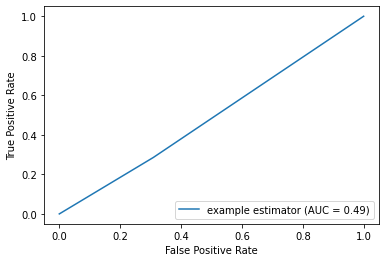

In [16]:
fpr, tpr, thresholds = roc_curve(y_predicted, y_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()


# W Smoted

In [19]:
X_train_smoted, X_test_smoted, y_train_smoted, y_test_smoted = train_test_split(data_smoted.drop('Средняя численность работников, включая внешних совместителей', axis=1),
                                                    data_smoted['Средняя численность работников, включая внешних совместителей'], test_size=0.5, random_state=42)


In [33]:
svc_optimal_n_neighbors = GridSearchCV(SVC(),
                                       {'probability': [True, False],
                                        'C': np.arange(1, 1.5, 0.1),
                                        #   'tol': np.arange(0, 2e-3, 1e-4),
                                        'degree': np.arange(0, 2, 1),
                                        #   'gamma': ['scale'] + [*np.arange(0, 1, 0.1)],
                                        'coef0': np.arange(0, 0.2, 0.1),
                                        'shrinking': [True, False],
                                        'break_ties': [True, False],
                                        'decision_function_shape': ['ovo', 'ovr'],
                                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
                                       n_jobs=6,
                                       scoring='recall',
                                       cv=3
                                       ).fit(X_train_smoted, y_train_smoted)
svc_optimal_n_neighbors.best_params_


c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [      nan       nan       nan ... 0.1007326 0.1007326 0.1007326]
  warnings.warn(


{'C': 1.2000000000000002,
 'break_ties': True,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 0,
 'kernel': 'linear',
 'probability': True,
 'shrinking': True}

In [34]:
y_predicted = svc_optimal_n_neighbors.predict(X_test_smoted)


In [35]:
print(confusion_matrix(y_test_smoted, y_predicted))


[[25 16]
 [16 31]]


In [36]:
print(classification_report(y_test_smoted, y_predicted))


              precision    recall  f1-score   support

       False       0.61      0.61      0.61        41
        True       0.66      0.66      0.66        47

    accuracy                           0.64        88
   macro avg       0.63      0.63      0.63        88
weighted avg       0.64      0.64      0.64        88



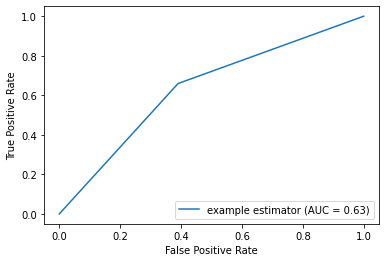

In [37]:
fpr, tpr, thresholds = roc_curve(y_predicted, y_test_smoted)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
